In [12]:
import pandas as pd
import numpy as np
import os
import time
from PIL import Image
import requests
from io import BytesIO
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="disn-wildlife")
import datamart_geo
geo_data = datamart_geo.GeoData.download() 
import uuid
from PIL import Image
from numpy import asarray
import seaborn as sns
sns.set_theme()
import pylab as pl
import altair as alt
alt.data_transformers.disable_max_rows()
from pandas_profiling import ProfileReport
from statistics import mean

In [3]:
df = pd.read_csv("extraction/complete_days_12_13.csv")

In [4]:
def fix_price_str(x):
    price = x
    if type(price)== str:
        price = price.replace("$", "")
        price = price.replace("pw", "")
        price = price.replace("pm", "")
        price = eval(price)
    if type(price) == float:
        return price
    if type(price) == int:
        return price
    if price == "None":
        return None
    if price == None:
        return None
    # if price:
    #     price = re.sub("[^0-9]", "", price)
    #     print(type(price))
    #     price = eval(price)
    return price
        
def fix_list_price(x):
    price = x
    if type(price) == list:
        prices = []
        for x in price:
            if x=="":
                continue
            else:
                prices.append(eval(x))
        price = mean(prices)
    if type(price) == tuple:
        price = price[1]
    return price

def fix_currency(x):
    x = x.replace("[", "")
    x = x.replace("]", "")
    return x

def fix_seller(x):
    if x=="None":
        x = eval(x)
    return x
df["seller"] =df["seller"].apply(lambda x: fix_seller(x))

In [13]:
df["price" ] = df["price"].apply(lambda x: fix_price_str(x)) ## repete for list/
df["price"] = df["price"].apply(lambda x: fix_list_price(x)) ## repete for list/

In [10]:
for i in df["price"].index:
    print(type(df["price"][i]))

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'int'>
<class 'int'>
<class 'float'>
<class 'int'>
<class 'float'>
<class 'int'>
<class 'int'>
<class 'NoneType'>
<class 'int'>
<class 'float'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'

In [6]:
df["currency"] = df["currency"].apply(lambda x: fix_currency(x))

In [19]:
df["ships to"] = df["ships to"].apply(lambda x: fix_seller(x))

In [7]:
def fix_seller(x):
    if x=="None":
        x = eval(x)
    return x
df["seller"] =df["seller"].apply(lambda x: fix_seller(x))

In [8]:
df["contain_seller"] = np.where(df["seller"].isnull(), False, True)

In [ ]:
## blotlenecks

In [23]:
df

url  \
0      http://picclick.com/A-Pod-Of-Spinner-Dolphins-...   
1      http://picclick.com/Aladdin-Shade-COACH-AND-FO...   
2      http://picclick.com/Aldon-Asiatic-Lion-1988-Ha...   
3      http://picclick.com/Antigua-Barbuda-1994-MNH-S...   
4      http://picclick.com/CatalinaStamps-Souvenir-Ca...   
...                                                  ...   
21898  https://www.thetaxidermystore.com/whitetail-de...   
21899  https://www.trocadero.com/directory/search.php...   
21900  https://www.trocadero.com/stores/Conservatoire...   
21901  https://www.trocadero.com/stores/galeriehafner...   
21902  https://www.trocadero.com/stores/jdog/items/11...   

                                                    name  \
0      A POD OF Spinner Dolphins Black White Canvas P...   
1      ALADDIN SHADE COACH AND FOUR, Fall Scene. new ...   
2      ALDON ASIATIC LION 1988 Hand Cold Cast Resonit...   
3      ANTIGUA &AMP; BARBUDA 1994 MNH, Sumatran Rhino...   
4      CATALINASTAMPS:  SOUVENIR - Cayman Islands Fri...   
...                                                  ...   
21898   Whitetail Deer Taxidermy Shoulder Mount For Sale   
21899  Early American Chippendale tall cherry chest-o...   
21900                Netsuke in wood. Tenuki the Badger.   
21901  Two Rare Chinese Dehua Blanc-de-Chine Porcelai...   
21902  Sterling Silver Hope Love Believe Peace Link B...   

                                             description  \
0      A Pod Of Spinner Dolphins Black White Canvas P...   
1      Aladdin Shade COACH AND FOUR, Fall Scene. new ...   
2      Aldon Asiatic Lion 1988 Hand Cold Cast Resonit...   
3      Antigua & Barbuda 1994 MNH, Sumatran Rhino, Wi...   
4      CatalinaStamps: Souvenir - Cayman Islands Frid...   
...                                                  ...   
21898  Specifications\nDimensions:*\n\nDepth:\n\n25"\...   
21899  Early American New England Chippendale era tal...   
21900  Tenuki is depicted standing, his head covered ...   
21901  Two small Blanc-de-Chine hand modelled porcela...   
21902  This popular bracelet measures 7 1/2" long. It...   

                                                   image production_data  \
0      https://www.picclickimg.com/4BMAAOSwtIBkKr0h/A...             NaN   
1      https://www.picclickimg.com/kocAAOSwq9dkM2BK/A...             NaN   
2      https://www.picclickimg.com/vWIAAOSwlWdfgoDL/A...             NaN   
3      https://www.picclickimg.com/Ey4AAOSwKdhdc5Tv/A...             NaN   
4      https://www.picclickimg.com/QH8AAOSwZn1jO3UF/C...             NaN   
...                                                  ...             ...   
21898  https://www.thetaxidermystore.com/media/catalo...             NaN   
21899  https://images3.trocadero.com/stores/collab/it...             NaN   
21900  https://images3.trocadero.com/stores/Conservat...             NaN   
21901  https://images3.trocadero.com/stores/galerieha...             NaN   
21902  https://images3.trocadero.com/stores/jdog/item...             NaN   

      category                                              title  \
0          NaN  A POD OF Spinner Dolphins Black White Canvas P...   
1          NaN  ALADDIN SHADE COACH AND FOUR,Fall Scene.new ol...   
2          NaN  ALDON ASIATIC LION 1988 Hand Cold Cast Resonit...   
3          NaN  ANTIGUA &AMP; BARBUDA 1994 MNH,Sumatran Rhino,...   
4          NaN  CATALINASTAMPS:SOUVENIR - Cayman Islands Fridg...   
...        ...                                                ...   
21898      NaN  Whitetail Deer Shoulder Mount For Sale #27346 ...   
21899      NaN                            Results for chippendale   
21900      NaN  Netsuke in wood.Tenuki the Badger.(item #1459050)   
21901      NaN  Two Rare Chinese Dehua Blanc-de-Chine Porcelai...   
21902      NaN  Sterling Silver Hope Love Believe Peace Link B...   

                                                    text    price currency  \
0      $18.59\nBuy It Now\nOfficial Adagio Interiors ...    18.59     

## distribution of each information extracted

In [20]:
profile = ProfileReport(df[["seller", "price", "location", "ships to" ]])
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Products with price information

In [978]:
df["contain_price"] = np.where(df["price"].isnull(), False, True)

In [979]:
labels = df[~df["final_label"].isnull()]["final_label"].unique()
porcentage_price = []
total_price = []
total_label = []
label_ = []
for label in labels:
    contain_price = len(df[(df.contain_price) & (df.final_label==label)])
    total = len(df[df.final_label==label])
    porcentage_price.append((contain_price/total))
    total_price.append(contain_price)
    total_label.append(total)
    label_.append(label)
    print(f"{total} Products classified as {label}")
    print(f"{contain_price} -> {(contain_price/total)*100}% has price information")
    print("___")

1252 Products classified as a print of an animal
1249 -> 99.76038338658148% has price information
___
16205 Products classified as an object
12110 -> 74.73002159827213% has price information
___
3642 Products classified as an animal body part
3305 -> 90.74684239428885% has price information
___
257 Products classified as a toy
257 -> 100.0% has price information
___
43 Products classified as a faux animal
43 -> 100.0% has price information
___
123 Products classified as a real animal
123 -> 100.0% has price information
___
262 Products classified as an faux animal body part
257 -> 98.09160305343512% has price information
___


In [980]:
df_test = pd.DataFrame({"porcentage_price": porcentage_price,
                        "total_price":total_price,
                        "total_label": total_label,
                        "label_":label_})

In [981]:
alt.Chart(df_test).mark_bar().encode(
    x=alt.X('porcentage_price:Q', axis=alt.Axis(format='%')),
    y=alt.Y('label_:O', title=None),
    color='label_:N',
    row=alt.Row(
        'final_label:N',
        title="Classes with price",
        header=alt.Header(labelAngle=0, labelAlign='left'),
    )
)

alt.Chart(...)

In [982]:
df.currency.value_counts()

USD             9413
None            5177
GBP             3637
'USD', 'USD'    3258
AUD              297
EUR               78
CAD               21
'GBP', 'GBP'      21
SGD                1
Name: currency, dtype: int64

262 Products classified as an animal body part
2136.484014110685 0.2 550000


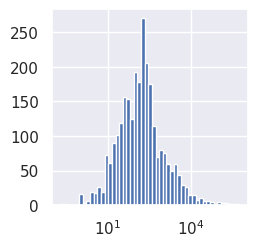

262 Products classified as a real animal
4544.051555555555 2.99 174995


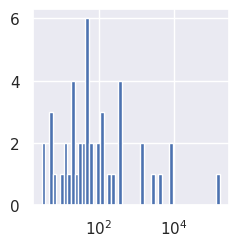

In [983]:
import matplotlib.pyplot as plt
import scipy.stats as stats   
labels = ["an animal body part", "a real animal"]
for label in labels:
    contain_price = df[(df.contain_price) & (df.final_label==label) & (df.currency=="USD") ]
    print(f"{total} Products classified as {label}")
    print(contain_price["price"].mean(), contain_price["price"].min(), contain_price["price"].max())

    MIN, MAX = contain_price["price"].min(), contain_price["price"].max()

    pl.figure()
    pl.hist(contain_price["price"], bins = 10 ** np.linspace(np.log10(MIN), np.log10(MAX), 50))
    pl.gca().set_xscale("log")
    pl.show()

## Products with location

In [984]:
df["contain_location"] = np.where(df["location"].isnull(), False, True)

In [985]:
labels = df[~df["final_label"].isnull()]["final_label"].unique()
porc_loc = []
total_loc = []
total_label = []
label_ = []

for label in labels:
    contain_price = len(df[(df.contain_location) & (df.final_label==label)])
    total = len(df[df.final_label==label])
    porc_loc.append((contain_price/total))
    total_loc.append(contain_price)
    total_label.append(total)
    label_.append(label)
    print(f"{total} Products classified as {label}")
    print(f"{contain_price} -> {(contain_price/total)*100}% has location available")
    print("___")

1252 Products classified as a print of an animal
290 -> 23.162939297124602% has location available
___
16205 Products classified as an object
2474 -> 15.266892934279545% has location available
___
3642 Products classified as an animal body part
218 -> 5.985722130697419% has location available
___
257 Products classified as a toy
174 -> 67.70428015564202% has location available
___
43 Products classified as a faux animal
9 -> 20.930232558139537% has location available
___
123 Products classified as a real animal
4 -> 3.2520325203252036% has location available
___
262 Products classified as an faux animal body part
16 -> 6.106870229007633% has location available
___


In [986]:
df_test = pd.DataFrame({"porc_loc": porc_loc,
                        "total_loc":total_loc,
                        "total_label": total_label,
                        "label_":label_})

In [987]:
alt.Chart(df_test).mark_bar().encode(
    x=alt.X('porc_loc:Q', axis=alt.Axis(format='%')),
    y=alt.Y('label_:O', title=None),
    color='label_:N',
    row=alt.Row(
        'final_label:N',
        title="Classes with location",
        header=alt.Header(labelAngle=0, labelAlign='left'),
    )
)


alt.Chart(...)

In [ ]:
# import the library and its Marker clusterization service
import folium
from folium.plugins import MarkerCluster
# Create a map object and center it to the avarage coordinates to m
map_ads = folium.Map(location=df[["lat", "lon"]].mean().to_list(), zoom_start=2)
# if the points are too close to each other, cluster them, create a cluster overlay with MarkerCluster, add to m
marker_cluster = MarkerCluster().add_to(map_ads)
# draw the markers and assign popup and hover texts
# add the markers the the cluster layers so that they are automatically clustered
df_map = df.dropna(subset= ["lat", "lon"])
for i,r in df_map.iterrows():
    location = (r["lat"], r["lon"])

    folium.Marker(location=location,
                      popup = r['country'],
                      tooltip=r['country'])\
    .add_to(marker_cluster)

In [993]:
map_ads

## Product with Seller information

In [1012]:
labels = df[~df["final_label"].isnull()]["final_label"].unique()
porcentage_seller = []
total_seller = []
total_label = []
label_ = []

for label in labels:
    contain_seller = len(df[(df.contain_seller) & (df.final_label==label)])
    total = len(df[df.final_label==label])
    porcentage_seller.append((contain_seller/total))
    total_seller.append(contain_seller)
    total_label.append(total)
    label_.append(label)
    
    print(f"{total} Products classified as {label}")
    print(f"{contain_seller} -> {(contain_seller/total)*100}% has Seller available")
    print("___")

1252 Products classified as a print of an animal
816 -> 65.17571884984025% has Seller available
___
16205 Products classified as an object
5248 -> 32.38506633755014% has Seller available
___
3642 Products classified as an animal body part
1809 -> 49.67051070840198% has Seller available
___
257 Products classified as a toy
185 -> 71.98443579766537% has Seller available
___
43 Products classified as a faux animal
25 -> 58.139534883720934% has Seller available
___
123 Products classified as a real animal
76 -> 61.78861788617886% has Seller available
___
262 Products classified as an faux animal body part
63 -> 24.045801526717558% has Seller available
___


In [1013]:
df_test = pd.DataFrame({"porcentage_seller": porcentage_seller,
                        "total_seller":total_seller,
                        "total_label": total_label,
                        "label_":label_})

In [1014]:

alt.Chart(df_test).mark_bar().encode(
    x=alt.X('porcentage_seller:Q', axis=alt.Axis(format='%')),
    y=alt.Y('label_:O', title=None),
    color='label_:N',
    row=alt.Row(
        'final_label:N',
        title="Classes with Seller information",
        header=alt.Header(labelAngle=0, labelAlign='left'),
    )
)

alt.Chart(...)

In [1068]:
df_seller = df[(df["final_label"]== "an animal body part") | (df["final_label"]== "a real animal")]
df_seller = df_seller["seller"].value_counts().rename_axis('sellers').reset_index(name='counts')

In [1069]:
df_seller =df_seller.sort_values(by=['counts'], ascending=False)
df_seller["count cumsum"] = df_seller["counts"].cumsum()
df_seller["cumpercentage"] = df_seller["count cumsum"]/(df_seller["counts"].sum())

In [1076]:
df_seller[df_seller["cumpercentage"]<=0.8]

sellers  counts  count cumsum  cumpercentage
0    Skulls Unlimited International, Inc.    1293          1293       0.685942
1                             MissSmithVT      26          1319       0.699735
2                             billsstamps      19          1338       0.709814
3                         vintagepaperads      14          1352       0.717241
4                              JamesDaddy      13          1365       0.724138
5                                 borucha      13          1378       0.731034
6                             lesbubstuff      12          1390       0.737401
7   Main Street Antiques and Collectibles      11          1401       0.743236
8                       crowncollectables       8          1409       0.747480
9                                     Pam       8          1417       0.751724
12                     allsortsofephemera       7          1424       0.755438
10            Silvermoon Jewelry and More       7          1431       0.759151
11                           Mohsin Arbab       7          1438       0.762865
13                            susiepoozie       6          1444       0.766048
14                                  x4joe       6          1450       0.769231
15                               MSSTAMPS       5          1455       0.771883
16                  Perry-Joyce Fine Arts       5          1460       0.774536
22               collectiblewildlifegifts       4          1464       0.776658
25                       Benjaman Gallery       4          1468       0.778780
24                   meditative.philately       4          1472       0.780902
23                     apple_blossom_park       4          1476       0.783024
17                             benidorm21       4          1480       0.785146
21                                   Jody       4          1484       0.787268
20                       The Box Emporium       4          1488       0.789390
19                                    Dan       4          1492       0.791512
18                                  Abbey       4          1496       0.793634
34                                      s       3          1499       0.795225
41                       Goda Zalenekaite       3          1502       0.796817
40                                contact       3          1505       0.798408
39                                  Tasha       3          1508       0.800000

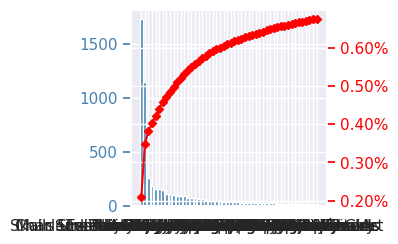

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(df_seller["sellers"][0:50], df_seller['counts'][0:50], color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(df_seller["sellers"][0:50],  df_seller['cumpercentage'][0:50], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()

## Products with images

In [998]:
list_path = os.listdir(path="data/disk/")
list_img = [i.replace(".png", "") for i in list_path]

In [1005]:
def get_images(x):
    if x in list_img:
        return True
    return False

df["contain_image"] = df["id"].apply(lambda x: get_images(x))  

In [1008]:
labels = df[~df["final_label"].isnull()]["final_label"].unique()
porcentage_images = []
total_images = []
total_label = []
label_ = []

for label in labels:
    contain_image = len(df[(df.contain_image) & (df.final_label==label)])
    total = len(df[df.final_label==label])
    porcentage_images.append((contain_image/total))
    total_images.append(contain_image)
    total_label.append(total)
    label_.append(label)
    
    print(f"{total} Products classified as {label}")
    print(f"{contain_image} -> {(contain_image/total)*100}% has Images available")
    print("___")

1252 Products classified as a print of an animal
990 -> 79.07348242811501% has Images available
___
16205 Products classified as an object
8748 -> 53.983338475779085% has Images available
___
3642 Products classified as an animal body part
2803 -> 76.96320702910488% has Images available
___
257 Products classified as a toy
205 -> 79.76653696498055% has Images available
___
43 Products classified as a faux animal
34 -> 79.06976744186046% has Images available
___
123 Products classified as a real animal
102 -> 82.92682926829268% has Images available
___
262 Products classified as an faux animal body part
118 -> 45.038167938931295% has Images available
___


In [1010]:
df_test = pd.DataFrame({"porcentage_images": porcentage_images,
                        "total_images":total_images,
                        "total_label": total_label,
                        "label_":label_})

In [1011]:
alt.Chart(df_test).mark_bar().encode(
    x=alt.X('porcentage_images:Q', axis=alt.Axis(format='%')),
    y=alt.Y('label_:O', title=None),
    color='label_:N',
    row=alt.Row(
        'final_label:N',
        title="Classes with Images",
        header=alt.Header(labelAngle=0, labelAlign='left'),
    )
)

alt.Chart(...)

#### Assumption that if the image is available the post is still on 

In [ ]:
Notes: Keep track of how long the same post are available -- current requests to the url?

In [24]:
## keep thing scalable, use title, price, description

In [ ]:
df["price"]

In [ ]:
«

In [343]:
for i in df["price"]:
    if type(i) == list:
        print(i)
        test = i
        break
        

['', '25', '36.80']


In [345]:
type(test)

list

In [349]:
list(map(float, test)) # => [1,2,3]


ValueError: could not convert string to float: ''

In [351]:
test.remove("")

In [177]:
import csv

def store_single_disk(image, image_id, label):
    """ Stores a single image as a .png file on disk.
        Parameters:
        ---------------
        image       image array, (32, 32, 3) to be stored
        image_id    integer unique ID for image
        label       image label
    """
    Image.fromarray(image).save(disk_dir / f"{image_id}.png")
    with open(f"{img}.csv", "wt") as csvfile:
        writer = csv.writer(
            csvfile, delimiter=" ", quotechar="|", quoting=csv.QUOTE_MINIMAL
        )
        writer.writerow([label])

In [179]:
store_single_disk(img, df["image"][0], "animal")

TypeError: expected string or buffer

In [ ]:
data = df[df["loc_name"]!="None, Torino, Piemonte, Italia"]

In [33]:
state=[]
country=[]
for index, row in data.iterrows():
    location = geolocator.reverse(str(row["lat"])+","+str(row["lon"]))
    address = location.raw['address']
    state.append(address.get("state"))
    country.append(address.get("country"))
data["state"]= state
data["country"]=country

/tmp/ipykernel_416/334503906.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["state"]= state
/tmp/ipykernel_416/334503906.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["country"]=country


In [45]:
data[(data["final_label"] == "an animal body part") | (data["final_label"] == "a real animal")]

url  \
131  https://www.1stdibs.com/art/paintings/animal-p...   
155  https://www.1stdibs.com/furniture/decorative-o...   
159  https://www.1stdibs.com/furniture/mirrors/wall...   

                                                  name  \
131  "Bull Elk" Massive 6-Foot Oil Painting on Canv...   
155      Bronze Mountain Lion with Tiffany & Co. Clock   
159  Antique Copper Toad Skin Design Mirror by Robe...   

                                           description  \
131  "Bull Elk (Wapiti)," an original oil on canvas...   
155  This vintage majestic bronze animal sculpture ...   
159  Toad skin design mirror\r\nAntique copper\r\nH...   

                                                 image     production_data  \
131  https://a.1stdibscdn.com/david-bungay-painting...           1980-1989   
155  https://a.1stdibscdn.com/bronze-mountain-lion-...  Early 20th Century   
159  https://a.1stdibscdn.com/antique-copper-toad-s...               2010-   

                  category                                              title  \
131       Animal Paintings  David Bungay - "Bull Elk"Massive 6-Foot Oil Pa...   
155  Figurative Sculptures  Bronze Mountain Lion with Tiffany and Co.Clock...   
159           Wall Mirrors  Antique Copper Toad Skin Design Mirror by Robe...   

                                                  text  price currency  ...  \
131  Shop Iconic Designs\nHome Accents\nShop by Des...  40000      USD  ...   
155  Shop Iconic Designs\nHome Accents\nShop by Des...   8500      USD  ...   
159  Shop Iconic Designs\nHome Accents\nShop by Des...   6900      USD  ...   

               label_name score_name          final_label  \
131   an animal body part   0.846716  an animal body part   
155  a print of an animal   0.397175  an animal body part   
159   an animal body part   0.395134  an animal body part   

                              point       lat         lon altitude  \
131  [39.7837304, -100.445882, 0.0]  39.78373 -100.445882      0.0   
155  [39.7837304, -100.445882, 0.0]  39.78373 -100.445882      0.0   
159  [39.7837304, -100.445882, 0.0]  39.78373 -100.445882      0.0   

          loc_name   state        country  
131  United States  Kansas  United States  
155  United States  Kansas  United States  
159  United States  Kansas  United States  

[3 rows x 26 columns]

In [52]:
animals = df[(df["final_label"] == "an animal body part") | (df["final_label"] == "a real animal")]

In [59]:
df[df["final_label"] == "a real animal"]

url                    name  \
41  http://www.freeads.co.uk/search?for=Freshwater...  American bully puppies   

                                          description  \
41  Two beautiful girls, fully vaccinated and micr...   

                                                image production_data  \
41  https://dd0f2wgjtus3v.cloudfront.net/img/270x2...            None   

                                     category  \
41  Pets > Puppies & Dogs > American Bulldogs   

                                                title  \
41  results for "Freshwater Sawfish"in UK Freeads ...   

                                                 text   price currency  ...  \
41  £75\nGO >>\nYou have already created alerts fo...  500.00      GBP  ...   

       label_description score_description     label_name score_name  \
41  a print of an animal          0.264146  a real animal   0.378023   

      final_label                       point        lat       lon altitude  \
41  a real animal  [44.933143, 7.540121, 0.0]  44.933143  7.540121      0.0   

                          loc_name  
41  None, Torino, Piemonte, Italia  

[1 rows x 24 columns]

In [49]:
df["label_name"].value_counts()

an object                   365
an animal body part         105
a print of an animal         55
an faux animal body part     15
a toy                         9
a faux animal                 4
a real animal                 1
Name: label_name, dtype: int64

In [53]:
animals["category"].value_counts()

Pets > Frogs & Amphibians                    2
Pets > Puppies & Dogs > Sprockers            1
Pets > Reptiles > Snakes > Boa Snakes        1
Pets > Puppies & Dogs > American Bulldogs    1
Pets > Puppies & Dogs > Chihuahuas           1
Pets > Reptiles > Lizards > Berber skinks    1
Animal Paintings                             1
Figurative Sculptures                        1
Wall Mirrors                                 1
Name: category, dtype: int64

In [47]:
data["name"].value_counts()

In the Range of Light III (Wastelands) - analog, Contemporary, Polaroid, Color            2
The Treasury Edition: Spidey Spectacular #3                                               1
Beware Of River Dolphin Rustic Sign Or Decal SignMission Classic Plaque | eBay            1
Chatham Hill Wargame Gettysburg - The Battlefield Game VG | eBay                          1
Pre-Order Toilet-bound Hanako-kun "Yako's Handmade Plush" Square Enix 15cm 5.9" | eBay    1
                                                                                         ..
Boa Lamp by Culto Ponsoda                                                                 1
Bronze Mountain Lion with Tiffany & Co. Clock                                             1
French Neoclassical Bronze  Of  Androcles and the Lion                                    1
KAWS SHARE Set of 2 (KAWS brown grey share companions)                                    1
Monica Lewinsky, sa vie, ses secrets, son histoire... - Thamin Julie - 1999 | eB

In [36]:
# import the library and its Marker clusterization service
import folium
from folium.plugins import MarkerCluster
# Create a map object and center it to the avarage coordinates to m
map_ads = folium.Map(location=data[["lat", "lon"]].mean().to_list(), zoom_start=2)
# if the points are too close to each other, cluster them, create a cluster overlay with MarkerCluster, add to m
marker_cluster = MarkerCluster().add_to(map_ads)
# draw the markers and assign popup and hover texts
# add the markers the the cluster layers so that they are automatically clustered
df = data.dropna(subset= ["lat", "lon"])
for i,r in df.iterrows():
    location = (r["lat"], r["lon"])

    folium.Marker(location=location,
                      popup = r['country'],
                      tooltip=r['country'])\
    .add_to(marker_cluster)

In [37]:
map_ads

In [130]:
import datamart_geo

In [131]:
geo_data = datamart_geo.GeoData.download() 

In [169]:
geo_data.resolve_name('USA').latitude

39.76

In [167]:
[geo for geo in geo_data.resolve_name_all('Nova iorque')][1].get_parent_area()

<datamart_geo.Area "Maranhão" (3395443) type=Type.ADMIN_1>